Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 9912422/9912422 [00:00<00:00, 15750332.33it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 28881/28881 [00:00<00:00, 484244.48it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 1648877/1648877 [00:00<00:00, 3782402.04it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 4542/4542 [00:00<00:00, 2493524.71it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

Época 1/5, Perda: 0.3600, Acurácia: 0.8928
Época 2/5, Perda: 0.1735, Acurácia: 0.9468
Época 3/5, Perda: 0.1271, Acurácia: 0.9603
Época 4/5, Perda: 0.1073, Acurácia: 0.9663
Época 5/5, Perda: 0.0913, Acurácia: 0.9719


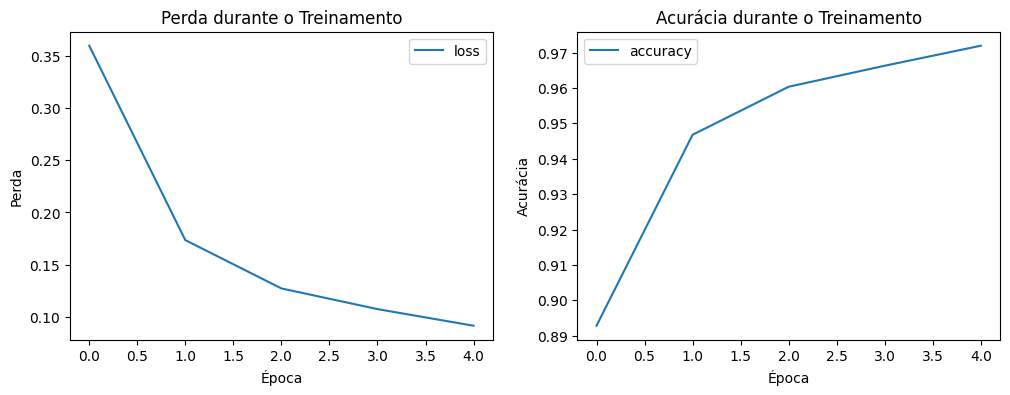

In [ ]:
# Algoritmo 1: Treinamento do Modelo com PyTorch

# Importando as bibliotecas necessárias
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import pandas as pd
import matplotlib.pyplot as plt

# Definindo a transformação para normalizar os dados
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# Carregando o conjunto de dados MNIST
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Definindo a rede neural
class NeuralNet(nn.Module):
    def __init__(self):
        super(NeuralNet, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = self.flatten(x)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Criando o modelo
model = NeuralNet()

# Definindo a função de perda e o otimizador
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Função para treinar o modelo
def train_model(model, train_loader, criterion, optimizer, epochs=5):
    history = {'loss': [], 'accuracy': []}

    for epoch in range(epochs):
        running_loss = 0.0
        correct = 0
        total = 0

        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            # Estatísticas
            running_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

        epoch_loss = running_loss / len(train_loader)
        epoch_acc = correct / total
        history['loss'].append(epoch_loss)
        history['accuracy'].append(epoch_acc)

        print(f'Época {epoch+1}/{epochs}, Perda: {epoch_loss:.4f}, Acurácia: {epoch_acc:.4f}')

    return history

# Treinando o modelo
history = train_model(model, train_loader, criterion, optimizer)

# Salvando o modelo treinado
torch.save(model.state_dict(), 'modelo_mnist_pytorch.pth')

# Criando um DataFrame do pandas para as métricas de treinamento
history_df = pd.DataFrame(history)

# Plotando as métricas de treinamento usando Pandas e Matplotlib
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Gráfico da perda (loss)
history_df[['loss']].plot(ax=axes[0])
axes[0].set_title('Perda durante o Treinamento')
axes[0].set_xlabel('Época')
axes[0].set_ylabel('Perda')

# Gráfico da acurácia (accuracy)
history_df[['accuracy']].plot(ax=axes[1])
axes[1].set_title('Acurácia durante o Treinamento')
axes[1].set_xlabel('Época')
axes[1].set_ylabel('Acurácia')

plt.show()


In [ ]:
# Algoritmo 2: Predição com o Modelo Treinado em PyTorch e Exibição de Métricas

# Importando as bibliotecas necessárias
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import pandas as pd
import numpy as np

# Definindo a transformação para normalizar os dados
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# Carregando o conjunto de dados MNIST
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Definindo a rede neural (mesma arquitetura usada para treinar)
class NeuralNet(nn.Module):
    def __init__(self):
        super(NeuralNet, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = self.flatten(x)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Criando o modelo
model = NeuralNet()

# Carregando os pesos do modelo treinado
model.load_state_dict(torch.load('modelo_mnist_pytorch.pth'))

# Avaliando o modelo e coletando previsões
def evaluate_model(model, test_loader):
    model.eval()  # Colocar o modelo em modo de avaliação
    y_pred = []
    y_real = []
    correct = 0
    total = 0

    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            y_pred.extend(predicted.numpy())
            y_real.extend(labels.numpy())
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

    accuracy = correct / total
    return np.array(y_real), np.array(y_pred), accuracy

# Fazendo predições e avaliando o modelo
y_test, y_pred, test_accuracy = evaluate_model(model, test_loader)

# Criando um DataFrame do pandas para exibir as métricas de previsão
metrics_df = pd.DataFrame({
    'Real': y_test,
    'Predito': y_pred
})

# Exibindo as primeiras 10 previsões
print(metrics_df.head(10))

# Exibindo a acurácia final
print(f"Acurácia no conjunto de teste: {test_accuracy:.4f}")


<ipython-input-2-7e637f9f9375>:37: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('modelo_mnist_pytorch.pth'))


   Real  Predito
0     7        7
1     2        2
2     1        1
3     0        0
4     4        4
5     1        1
6     4        4
7     9        9
8     5        5
9     9        9
Acurácia no conjunto de teste: 0.9670
